KNN MODEL

In [4]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

import pandas as pd

# Load your datasets
approx_entropy_df = pd.read_csv('Combined_Entropy.csv')
entropy_per_channel_df = pd.read_csv('eeg_entropy_features.csv')
frequency_features_df = pd.read_csv('eeg_frequency_features.csv')

# Merge all datasets on Patient_ID
combined_data = approx_entropy_df.merge(entropy_per_channel_df, on="Patient_ID",how='left')
combined_data = combined_data.merge(frequency_features_df, on="Patient_ID",how='left')

# Merge with suffixes to keep track of Label columns
combined_data = approx_entropy_df.merge(entropy_per_channel_df, on="Patient_ID", how='left', suffixes=('', '_entropy'))
combined_data = combined_data.merge(frequency_features_df, on="Patient_ID", how='left', suffixes=('', '_frequency'))

# Check if 'Label_entropy' and 'Label_frequency' columns are identical to 'Label'
if 'Label_entropy' in combined_data.columns and (combined_data['Label'] == combined_data['Label_entropy']).all():
    combined_data = combined_data.drop(columns=['Label_entropy'])
if 'Label_frequency' in combined_data.columns and (combined_data['Label'] == combined_data['Label_frequency']).all():
    combined_data = combined_data.drop(columns=['Label_frequency'])

print(combined_data.head(1))
print(combined_data.shape)
print(combined_data['Label'].value_counts())




    Patient_ID  Label       Fp1       Fp2        F3        F4        C3  \
0  v1p_v1p.csv      1  1.642273  1.399319  1.788776  1.385568  1.894291   

         C4        P3        P4  ...  occipital_theta_avg_power  \
0  1.719796  1.915635  1.512754  ...                 556.439793   

   occipital_alpha_avg_power  occipital_beta_avg_power  \
0                 417.316758                589.752563   

   occipital_gamma_avg_power  temporal_delta_avg_power  \
0                 195.140531                  879.2552   

   temporal_theta_avg_power  temporal_alpha_avg_power  \
0                580.225853                478.095124   

   temporal_beta_avg_power  temporal_gamma_avg_power  \
0               480.728786                 232.60505   

   frontal_parietal_theta_ratio  
0                      0.983045  

[1 rows x 240 columns]
(121, 240)
Label
1    61
0    60
Name: count, dtype: int64


In [5]:
# Separate features and target label
X = combined_data.drop(columns=["Patient_ID", "Label"])
y = combined_data["Label"]


In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (96, 238)
Shape of y_train: (96,)
Shape of X_test: (25, 238)
Shape of y_test: (25,)


Accuracy: 0.6

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.50      0.62        16
           1       0.47      0.78      0.58         9

    accuracy                           0.60        25
   macro avg       0.63      0.64      0.60        25
weighted avg       0.68      0.60      0.60        25



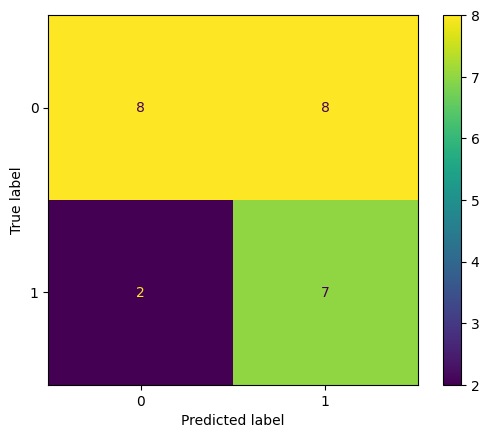

In [7]:

# Initialize and train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can change n_neighbors as needed
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test)
plt.show()

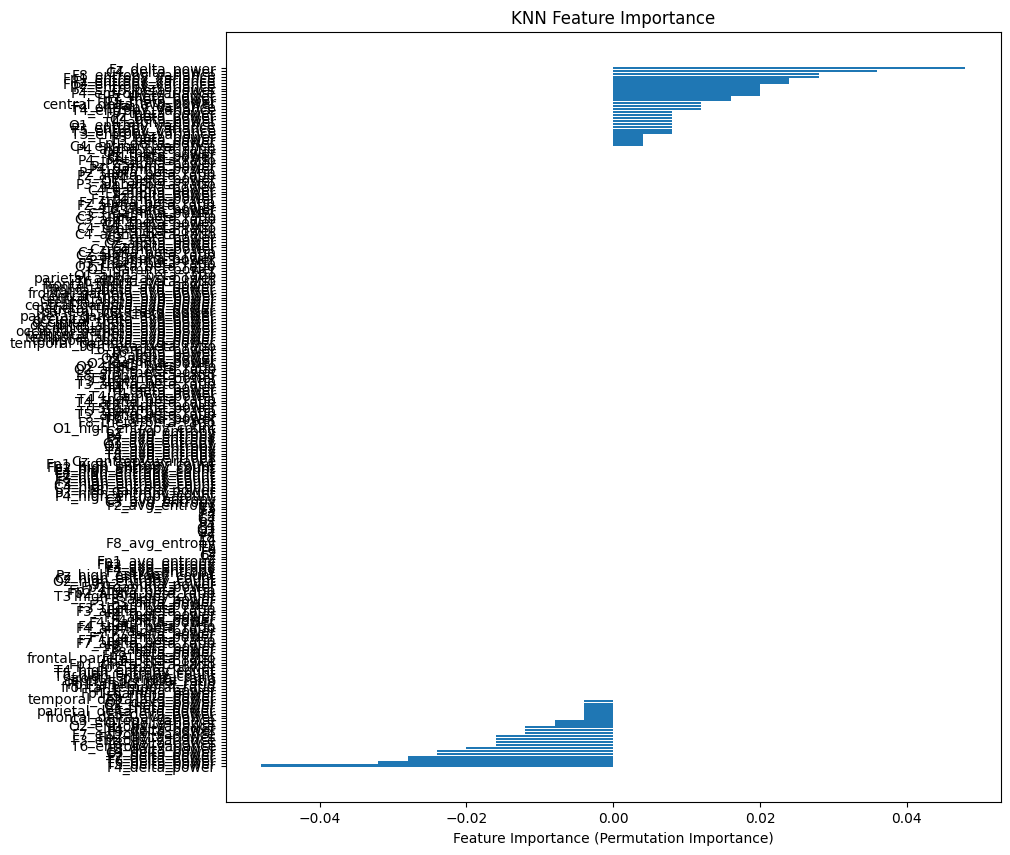

In [8]:
from sklearn.inspection import permutation_importance
# Assuming you have already loaded and split your data into X and y

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Evaluate feature importance using permutation importance
result = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame to view feature importance
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": result.importances_mean
})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 10))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance (Permutation Importance)")
plt.title("KNN Feature Importance")
plt.show()

In [9]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

def knn_hyperparameter_tuning(X, y):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the hyperparameter grid
    param_grid = {
        'n_neighbors': [3, 5, 7, 9, 11, 15],  # Range of neighbors to try
        'weights': ['uniform', 'distance'],   # Weighting schemes
        'metric': ['euclidean', 'manhattan']  # Distance metrics
    }

    # Initialize the KNN model
    knn_model = KNeighborsClassifier()

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best parameters and score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print("Best Parameters:", best_params)
    print("Best Cross-Validation Accuracy:", best_score)

    # Train the KNN model with the best parameters
    knn_model = KNeighborsClassifier(**best_params)
    knn_model.fit(X_train, y_train)

    # Make predictions
    y_pred = knn_model.predict(X_test)

    # Evaluate the model
    print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
    print("\nClassification Report on Test Set:\n", classification_report(y_test, y_pred))

    # Display confusion matrix
    ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test)
    plt.title("Confusion Matrix for KNN Model")
    plt.show()

# Example usage (Make sure to replace `X` and `y` with your data)
# knn_hyperparameter_tuning(X, y)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.7410526315789474
Accuracy on Test Set: 0.72

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.91      0.62      0.74        16
           1       0.57      0.89      0.70         9

    accuracy                           0.72        25
   macro avg       0.74      0.76      0.72        25
weighted avg       0.79      0.72      0.72        25



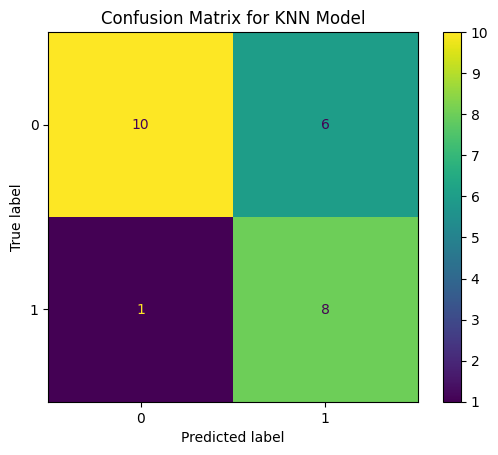

In [10]:
# Assuming `X` and `y` are already defined
knn_hyperparameter_tuning(X, y)
